In [1]:
%load_ext autoreload
%autoreload 2

from datasets import DataCifar10
from models import MultiLayerConvNet
from optimers import OptimerSGD, OptimerAdam
from utils import check_accuracy, check_gradient
from utils import show_training_infos, show_training_info

In [2]:
# load data
dataloader = DataCifar10('./datasets/cifar-10-batches-py', norm_dis_mean=True, norm_div_std=False,
                         num_val=1000, num_train=49000, num_test=1000)
    
print('Training data shape: ', dataloader.x_train.shape)
print('Training labels shape: ', dataloader.y_train.shape)
print('Validating data shape: ', dataloader.x_val.shape)
print('Validating labels shape: ', dataloader.y_val.shape)
print('Testing data shape: ', dataloader.x_test.shape)
print('Testing labels shape: ', dataloader.y_test.shape)

Training data shape:  (49000, 3, 32, 32)
Training labels shape:  (49000,)
Validating data shape:  (1000, 3, 32, 32)
Validating labels shape:  (1000,)
Testing data shape:  (1000, 3, 32, 32)
Testing labels shape:  (1000,)


# Sanity check

### Gradient check

In [3]:
def get_init_model(hyperparams):
    return MultiLayerConvNet([3, 32, 32], 10, hyperparams=hyperparams, seed=99)

# init model
model = get_init_model({'reg': 0.6, 'init_scale': None, 'nums_conv': [16, 32], 'nums_hidden': [100]})

# sanity check
loss = model.backward(dataloader.x_train[0: 100, :], dataloader.y_train[0: 100])
print('Sanity check result:')
print('Init loss is', loss)

# gradient check
for i in range(1):
    print('\nGradient check result - ', i + 1, ':')
    check_gradient(model, dataloader.x_train[0: 100, :], dataloader.y_train[0: 100])

Sanity check result:
Init loss is 98.49625023668301

Gradient check result -  1 :
Layer | Key | Numerical gradient | Calculated gradient | Relative error
<class 'models.layers.Spatial_BatchNorm'> gamma -0.06349826833229599 -0.06361828285570416 0.0018882595899045297
<class 'models.layers.Spatial_BatchNorm'> beta -0.11593589590574992 -0.11594169305319983 5.0001791686228995e-05
<class 'models.layers.Conv'> W 0.024804927534205486 0.024804927541320753 2.8684892138162597e-10
<class 'models.layers.Conv'> b -0.06040902462700614 -0.060408180965728635 1.3965912774861933e-05
<class 'models.layers.Spatial_BatchNorm'> gamma 0.010733107558280606 0.010691422409230288 0.0038913478254628507
<class 'models.layers.Spatial_BatchNorm'> beta -0.017082334125007037 -0.01707502229255143 0.00042812636705390504
<class 'models.layers.Conv'> W 0.08418451358238599 0.08418451348401226 1.1685489611244918e-09
<class 'models.layers.Conv'> b 0.07665896788466853 0.07665896934434296 1.9041143694704783e-08
<class 'models.l

### Overfit small dataset

In [4]:
# load small dataset
smallloader = DataCifar10('./datasets/cifar-10-batches-py', 
                          num_train=100, num_test=100, num_val=100)

# init model
model = get_init_model({'reg': 0.})

optimer = OptimerAdam({'learn_rate': 1e-3, 
                       'num_iters': 200, 
                       'batch_size': 50}, print_every=20)

# train model
optimer.train(model, smallloader)

# save model
model.save('./saves/MultiLayerConvNet/model_small.pkl')

0 / 200 loss is 2.302585091185957
20 / 200 loss is 2.1640512795303497
40 / 200 loss is 1.3377259237846897
60 / 200 loss is 0.6095258006497406
80 / 200 loss is 0.3067217140413032
100 / 200 loss is 0.1730643144905887
120 / 200 loss is 0.08977818163952633
140 / 200 loss is 0.09011505467464163
160 / 200 loss is 0.08158934342845763
180 / 200 loss is 0.10028959401206176


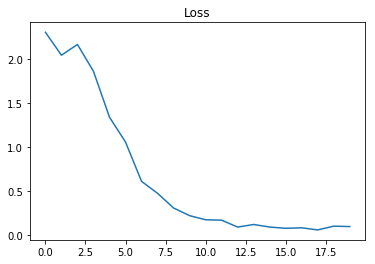

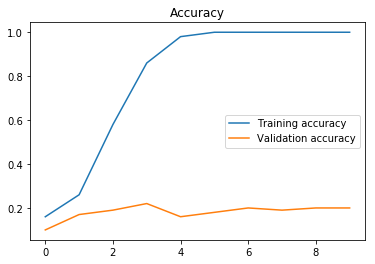

In [5]:
# plot loss curve
show_training_info(optimer)

In [6]:
# load model
model = MultiLayerConvNet.load('./saves/MultiLayerConvNet/model_small.pkl')

# check accuracy
scores = model.predict(smallloader.x_test)
accuracy = check_accuracy(scores, smallloader.y_test)
    
print('The accuracy on testing dataset is ', accuracy)

The accuracy on testing dataset is  0.18


# Train multi-layer convnet

In [31]:
# init model
if True:
    model = get_init_model({'reg': 0.01, 'init_scale': None, 
                            'nums_conv': [16, 32, 64, 64, 128], 'nums_hidden': [512]})
else:
    model = MultiLayerConvNet.load('./saves/MultiLayerConvNet/model.pkl')

optimer = OptimerAdam({'learn_rate': 1e-3, 
                       'learn_rate_decay':0.95,
                       'num_iters': 8000, 
                       'batch_size': 64}, print_every=100, record_every=50)

# train model
optimer.train(model, dataloader)

# save model
model.save('./saves/MultiLayerConvNet/model.pkl')

0 / 8000 loss is 11.912955411959055
100 / 8000 loss is 4.830708078213337
200 / 8000 loss is 2.9957214457156156
300 / 8000 loss is 2.0415662297791974
400 / 8000 loss is 2.005717275209516
500 / 8000 loss is 1.88022303823152
600 / 8000 loss is 1.6758329636362856
700 / 8000 loss is 1.3611969129480455
800 / 8000 loss is 1.4305706772863098
900 / 8000 loss is 1.393157426442193
1000 / 8000 loss is 1.534281301822195
1100 / 8000 loss is 1.3720969889559373
1200 / 8000 loss is 1.3500980658862618
1300 / 8000 loss is 1.472436639386426
1400 / 8000 loss is 1.2212554119312944
1500 / 8000 loss is 1.5038779860350864
1600 / 8000 loss is 1.296518025530967
1700 / 8000 loss is 1.199356671395188
1800 / 8000 loss is 1.0034180465993645
1900 / 8000 loss is 1.328707688547246
2000 / 8000 loss is 1.2521835906968288
2100 / 8000 loss is 1.082181584356254
2200 / 8000 loss is 1.1067547127032926
2300 / 8000 loss is 1.0071529791160845
2400 / 8000 loss is 1.0715195615969066
2500 / 8000 loss is 1.0902307617010119
2600 / 80

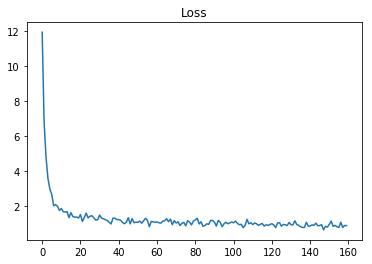

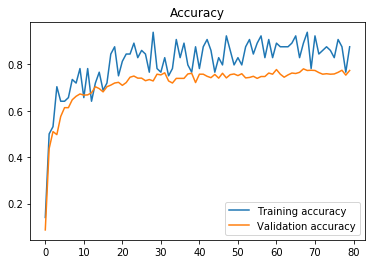

In [32]:
# plot loss curve
show_training_info(optimer)

In [33]:
# load model
model = MultiLayerConvNet.load('./saves/MultiLayerConvNet/model.pkl')

# check accuracy
scores = model.predict(dataloader.x_test)
accuracy = check_accuracy(scores, dataloader.y_test)
    
print('The accuracy on testing dataset is', accuracy)

The accuracy on testing dataset is 0.752


# Check all the trained models

In [34]:
def check_model(model_name):
    # load model
    model = MultiLayerConvNet.load('./saves/MultiLayerConvNet/' + model_name)

    # check accuracy
    scores = model.predict(dataloader.x_test)
    accuracy = check_accuracy(scores, dataloader.y_test)

    print('<', model_name, '>', 'Testing accuracy:', accuracy)
    
# check the trained models
check_model('model_conv_16_32_hide_100.pkl')
check_model('model_conv_16_32_64_64_hide_300.pkl')
check_model('model_conv_16_32_64_64_128_hide_512.pkl')

< model_conv_16_32_hide_100.pkl > Testing accuracy: 0.707
< model_conv_16_32_64_64_hide_300.pkl > Testing accuracy: 0.775
< model_conv_16_32_64_64_128_hide_512.pkl > Testing accuracy: 0.752
